In [1]:
import numpy as np
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
import sklearn.preprocessing as pp
from utils import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score

/home/mihai/Thesis/thesis/lib/python3.9/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


## Read data

In [2]:
error_signal = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/e.csv', delimiter=',')
u_signal =np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/u.csv', delimiter=',')
tc = np.loadtxt(r'/home/mihai/Thesis/Data/Clean_CSV_data/updated_data/PRDPE/mdist.csv', delimiter=',')

error_signal = error_signal[:, 0]
u_signal = u_signal[:, 0]
tc = tc[:, 0]

# Create feature matrix and labels
scaler = pp.StandardScaler()
error_signal = scaler.fit_transform(error_signal.reshape(-1, 1)).flatten()
u_signal = scaler.fit_transform(u_signal.reshape(-1, 1)).flatten()

error_derivative = np.diff(error_signal)
u_signal_derivative = np.diff(u_signal)

error_derivative = scaler.fit_transform(error_derivative.reshape(-1, 1)).flatten()
u_signal_derivative = scaler.fit_transform(u_signal_derivative.reshape(-1, 1)).flatten()

X = np.column_stack((error_signal[:-1], u_signal[:-1]))
y = tc[:-1]

In [3]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

# Create a KNN classifier using Dynamic Time Warping (DTW) as the distance metric
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=5)

# Fit the classifier on the training data
knn_dtw.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = knn_dtw.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     10377
         1.0       0.80      0.74      0.77       423

    accuracy                           0.98     10800
   macro avg       0.90      0.87      0.88     10800
weighted avg       0.98      0.98      0.98     10800



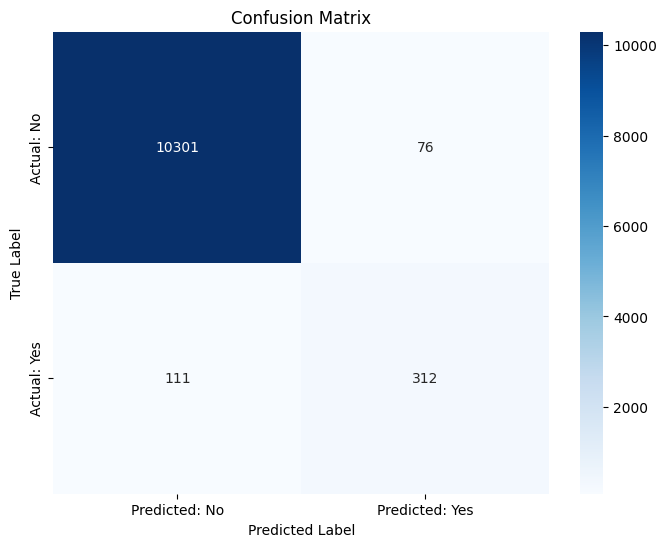

In [4]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred))